# TO DO LIST

- Radar Plots

- Pie Charts

- Colour Map (green if possible)


## The goal of this notebook is to combine the 3 perspectives that were created in order to obtain final clusters that characterize the customers and allow the definition of marketing strategies.


### 1. DOW and HOURS Merge

    1.1 First Iteration Full Data

    1.2 Second Iteration without Outliers

    1.3 Joining the two Perspectives (DOW + HOURS)

### 2. (HOURS AND DOW) + CUI MERGE

    2.1 First Iteration Full Data

    2.2 Second Iteration without Outliers

    2.3 Joining the two Perspectives [DOW + HOURS] + CUI

### 3. Evaluating Cluster Quality (Entropy Analysis)

### 4. Cluster Profiling

      4.1 Radar Plots

      4.2 Distribution of Clients per Cluster

      4.3 Age as a factor

      4.4 Weight of each cluster on the Total Amount Spent

      4.5 Characterization of the clusters through the new features

      4.6 City Distribution by Cluster

In [1]:
import pandas as pd
import numpy as np
# Custom Modules
import sys
sys.path.append('../Functions')  # Adjust the path to your custom module directory
import CleanUp as p  # Importing custom CleanUp module

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import RobustScaler

In [2]:
filepath = '../Data/DM2425_ABCDEats_DATASET.csv'
# Load the raw data
raw_data = pd.read_csv(filepath)
df, columns_dict = p.cleanUp(raw_data)

-----------looking for incostisencies -----------
There are repeated values in the dataset
      customer_id customer_region  customer_age  vendor_count  product_count  \
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  ...  \
20855         0         35.0          35          -           CARD  ...   
20907         0         35.0          35          -           CARD  ...   

       HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
20855      0      0      0      0      0      0      0      0      0      0  
20907      0      0      0      0      0      0      0      0      0      0  

[2 rows x 56 columns]
There are inconsistencies between DOW and HR columns
1553.0
filling HR_0
-----------identify the numerical columns -----------
primary_key is not numerical
-----------Identify the non n

In [3]:
key = columns_dict.keys()
print(key)
new_features_list = columns_dict['new_features_list']
numerical_columns = columns_dict['numerical_columns']
CUI_col = columns_dict['CUI_col']
HR_col = columns_dict['HR_col']
DOW_col = columns_dict['DOW_col']

dict_keys(['non_numerical_columns', 'new_features_list', 'numerical_columns', 'CUI_col', 'HR_col', 'DOW_col'])


In [4]:
# Removing people above 53 years old and below 15 years old
df = df[(df['customer_age'] <= 52)]

In [5]:
key = columns_dict.keys()
print(key)
new_features_list = columns_dict['new_features_list']
numerical_columns = columns_dict['numerical_columns']
CUI_col = columns_dict['CUI_col']
HR_col = columns_dict['HR_col']
DOW_col = columns_dict['DOW_col']

dict_keys(['non_numerical_columns', 'new_features_list', 'numerical_columns', 'CUI_col', 'HR_col', 'DOW_col'])


In [6]:
# Removing people above 53 years old and below 15 years old
df = df[(df['customer_age'] <= 52)]

In [7]:
hours_cluster = pd.read_csv("hours_clusters.csv")
hours_cluster

,K_Means_5_clusters
0,2
1,2
2,2
3,2
4,2
...,...
31454,2
31455,2
31456,2
31457,2


In [8]:
dow_clusters = pd.read_csv("DOW_K_means_4_clusters.csv")
dow_clusters

,K_Means_4_clusters
0,1
1,1
2,1
3,1
4,1
...,...
31454,1
31455,1
31456,1
31457,1


In [9]:
df.reset_index(drop=True, inplace=True)
df["HOURS_CLUSTER"] = hours_cluster["K_Means_5_clusters"]
df["DOW_CLUSTER"] = dow_clusters["K_Means_4_clusters"]

In [10]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [11]:
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,avg_product_by_order,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,2.5,2.0,28.88,1.000000,14.440,2.500000,5.776,5.776,2,1
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,1.0,2.0,19.21,1.000000,9.605,1.000000,9.605,9.605,2,1
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,1.0,2.0,9.20,1.000000,4.600,1.000000,4.600,4.600,2,1
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,1.5,3.0,31.56,0.666667,10.520,1.000000,10.520,10.520,2,1
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,2.5,3.0,55.44,0.666667,18.480,1.666667,11.088,11.088,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,1.0,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,1.0,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,1.0,1.0,17.79,1.000000,17.790,1.000000,17.790,17.790,2,1
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,1.0,1.0,12.03,1.000000,12.030,1.000000,12.030,12.030,2,1


# 1. DOW and HOURS Merge

## 1.1 First Iteration Full Data

In [12]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['HOURS_CLUSTER', 'DOW_CLUSTER'])\
    [DOW_col + HR_col].mean()
df_centroids

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.054931  0.055160  0.056286  0.058009  0.084343   
              1            0.033542  0.027481  0.037323  0.030888  0.042712   
              2            0.105985  0.108552  0.117207  0.098724  0.106764   
              3            0.248864  0.212299  0.249091  0.218182  0.227273   
1             0            0.045641  0.043012  0.054010  0.053903  0.070254   
              1            0.032090  0.032116  0.038944  0.041434  0.064887   
              2            0.091560  0.089940  0.106379  0.101356  0.104111   
              3            0.191406  0.178676  0.217500  0.190441  0.227344   
2             0            0.029571  0.023879  0.030646  0.028678  0.037788   
              1            0.017034  0.016138  0.019409  0.018163  0.023762   
              2            0.071973  0.072222  0.087045  0.078946  0.071444   
3             0            0.054688  0.043693  0.052724  0.049774  0.057091   
              1            0.035212  0.033000  0.042105  0.035041  0.034988   
              2            0.091751  0.093023  0.102422  0.090287  0.085302   
              3            0.210145  0.219949  0.224155  0.213129  0.231884   
4             0            0.094595  0.082141  0.094895  0.101219  0.123874   
              2            0.146404  0.152834  0.181431  0.150416  0.149829   
              3            0.257483  0.251989  0.287805  0.260076  0.265937   

                              DOW_5     DOW_6      HR_0      HR_1      HR_2  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.114706  0.124740  0.019146  0.008403  0.006055   
              1            0.027992  0.030309  0.010039  0.004688  0.002252   
              2            0.052494  0.051870  0.026434  0.013003  0.009144   
              3            0.173182  0.214545  0.041212  0.022727  0.016667   
1             0            0.107425  0.126175  0.000815  0.001007  0.000392   
              1            0.032390  0.035431  0.000000  0.000000  0.000000   
              2            0.040633  0.044912  0.000898  0.000963  0.000618   
              3            0.127500  0.151250  0.000000  0.000000  0.000000   
2             0            0.091555  0.101200  0.003135  0.003565  0.003919   
              1            0.018082  0.019121  0.001753  0.001788  0.002558   
              2            0.020745  0.021041  0.003274  0.003508  0.003175   
3             0            0.108774  0.111538  0.018429  0.031422  0.048277   
              1            0.026914  0.024522  0.004785  0.017430  0.030901   
              2            0.036628  0.033648  0.019283  0.034572  0.050388   
              3            0.150725  0.171739  0.053140  0.093168  0.138889   
4             0            0.178829  0.211712  0.003003  0.000644  0.001502   
              2            0.060502  0.062785  0.000913  0.000652  0.000381   
              3            0.195344  0.211086  0.004878  0.005860  0.005913   

                           ...     HR_14     HR_15     HR_16     HR_17  \
HOURS_CLUSTER DOW_CLUSTER  ...                                           
0             0            ...  0.033804  0.015496  0.017144  0.023702   
              1            ...  0.008316  0.002182  0.004037  0.006757   
              2            ...  0.031268  0.017131  0.015189  0.025187   
              3            ...  0.101399  0.042292  0.051240  0.065000   
1             0            ...  0.048438  0.042579  0.061688  0.081579   
              1            ...  0.024154  0.037329  0.066028  0.058062   
              2            ...  0.046133  0.046935  0.071398  0.082143   
              3            ...  0.077885  0.110870  0.207955  0.258125   
2             0            ...  0.021187  0.010014  0.009859  0.015595   
              1            ...  0.009059  0.006260  0.

Text(0, 0.5, 'Euclidean Distance')

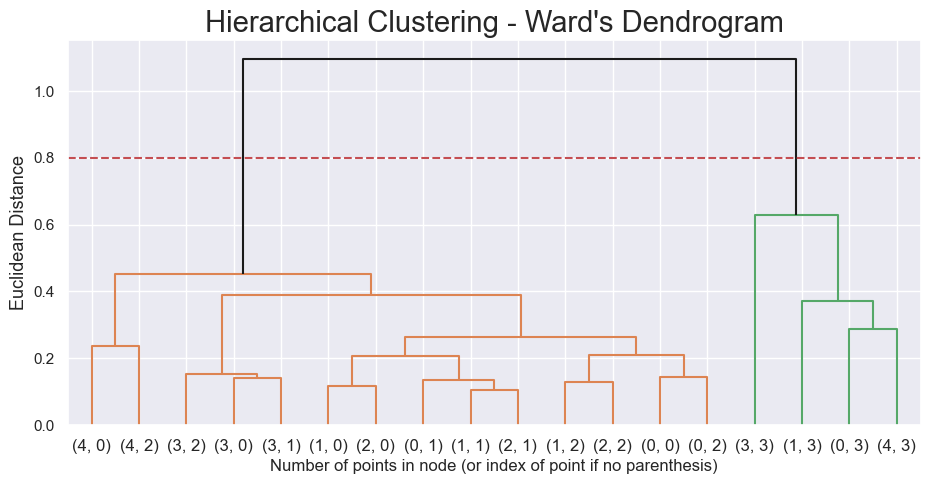

In [13]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(df_centroids)

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 0.8
# y_threshold = 3.3

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)

In [14]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters= 2
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.054931  0.055160  0.056286  0.058009  0.084343   
              1            0.033542  0.027481  0.037323  0.030888  0.042712   
              2            0.105985  0.108552  0.117207  0.098724  0.106764   
              3            0.248864  0.212299  0.249091  0.218182  0.227273   
1             0            0.045641  0.043012  0.054010  0.053903  0.070254   
              1            0.032090  0.032116  0.038944  0.041434  0.064887   
              2            0.091560  0.089940  0.106379  0.101356  0.104111   
              3            0.191406  0.178676  0.217500  0.190441  0.227344   
2             0            0.029571  0.023879  0.030646  0.028678  0.037788   
              1            0.017034  0.016138  0.019409  0.018163  0.023762   
              2            0.071973  0.072222  0.087045  0.078946  0.071444   
3             0            0.054688  0.043693  0.052724  0.049774  0.057091   
              1            0.035212  0.033000  0.042105  0.035041  0.034988   
              2            0.091751  0.093023  0.102422  0.090287  0.085302   
              3            0.210145  0.219949  0.224155  0.213129  0.231884   
4             0            0.094595  0.082141  0.094895  0.101219  0.123874   
              2            0.146404  0.152834  0.181431  0.150416  0.149829   
              3            0.257483  0.251989  0.287805  0.260076  0.265937   

                              DOW_5     DOW_6      HR_0      HR_1      HR_2  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.114706  0.124740  0.019146  0.008403  0.006055   
              1            0.027992  0.030309  0.010039  0.004688  0.002252   
              2            0.052494  0.051870  0.026434  0.013003  0.009144   
              3            0.173182  0.214545  0.041212  0.022727  0.016667   
1             0            0.107425  0.126175  0.000815  0.001007  0.000392   
              1            0.032390  0.035431  0.000000  0.000000  0.000000   
              2            0.040633  0.044912  0.000898  0.000963  0.000618   
              3            0.127500  0.151250  0.000000  0.000000  0.000000   
2             0            0.091555  0.101200  0.003135  0.003565  0.003919   
              1            0.018082  0.019121  0.001753  0.001788  0.002558   
              2            0.020745  0.021041  0.003274  0.003508  0.003175   
3             0            0.108774  0.111538  0.018429  0.031422  0.048277   
              1            0.026914  0.024522  0.004785  0.017430  0.030901   
              2            0.036628  0.033648  0.019283  0.034572  0.050388   
              3            0.150725  0.171739  0.053140  0.093168  0.138889   
4             0            0.178829  0.211712  0.003003  0.000644  0.001502   
              2            0.060502  0.062785  0.000913  0.000652  0.000381   
              3            0.195344  0.211086  0.004878  0.005860  0.005913   

                           ...     HR_15     HR_16     HR_17     HR_18  \
HOURS_CLUSTER DOW_CLUSTER  ...                                           
0             0            ...  0.015496  0.017144  0.023702  0.029844   
              1            ...  0.002182  0.004037  0.006757  0.005148   
              2            ...  0.017131  0.015189  0.025187  0.029094   
              3            ...  0.042292  0.051240  0.065000  0.077273   
1             0            ...  0.042579  0.061688  0.081579  0.048050   
              1            ...  0.037329  0.066028  0.058062  0.020863   
              2            ...  0.046935  0.071398  0.082143  0.050034   
              3            ...  0.110870  0.207955  0.258125  0.148958   
2             0            ...  0.010014  0.009859  0.015595  0.020913   
              1            ...  0.006260  0.007998  0.

In [15]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()
cluster_mapper


{(0, 0): 1,
 (0, 1): 1,
 (0, 2): 1,
 (0, 3): 0,
 (1, 0): 1,
 (1, 1): 1,
 (1, 2): 1,
 (1, 3): 0,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 1,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 0,
 (4, 0): 1,
 (4, 2): 1,
 (4, 3): 0}

In [16]:
df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['Merged_Cluster_1'] = df_.apply(
    lambda row: cluster_mapper[
        (row['HOURS_CLUSTER'], row['DOW_CLUSTER'])
    ], axis=1
)

df_ 

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER,Merged_Cluster_1
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,2.0,28.88,1.000000,14.440,2.500000,5.776,5.776,2,1,1
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,2.0,19.21,1.000000,9.605,1.000000,9.605,9.605,2,1,1
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,2.0,9.20,1.000000,4.600,1.000000,4.600,4.600,2,1,1
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,3.0,31.56,0.666667,10.520,1.000000,10.520,10.520,2,1,1
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,3.0,55.44,0.666667,18.480,1.666667,11.088,11.088,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,1.0,17.79,1.000000,17.790,1.000000,17.790,17.790,2,1,1
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,1.0,12.03,1.000000,12.030,1.000000,12.030,12.030,2,1,1


In [17]:
# Merged cluster centroids
df_.groupby('Merged_Cluster_1').mean(numeric_only=True)[numerical_columns]

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
Merged_Cluster_1,,,,,,,,,,,,,,,,,,,,,
0,0.332585,0.289613,0.131674,0.223536,0.049124,0.947653,0.074393,0.040291,0.042473,0.033790,...,0.104659,0.073178,0.096031,0.125141,0.097124,0.051952,0.029773,0.042766,0.021972,0.020693
1,0.329634,0.047431,0.014876,0.029722,0.320580,0.702800,0.016191,0.010479,0.009326,0.001756,...,0.014610,0.010691,0.014391,0.017189,0.012194,0.006029,0.003400,0.005635,0.002808,0.003112


In [18]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('Merged_Cluster_1')\
    .size()\
    .to_frame()

df_counts

,0
Merged_Cluster_1,
0,710
1,30749


We can see that we this merge divides our customers in 2 clusters, the majority of them (cluster 1) and the outliers (cluster 0)

In [19]:
df["Merged_Cluster_1"] = df_["Merged_Cluster_1"]

In [20]:
df.groupby('Merged_Cluster_1')["customer_age"].agg(["mean", "min","max"])

,mean,min,max
Merged_Cluster_1,,,
0,0.332585,0.027027,0.972973
1,0.329634,0.000000,1.000000


Age its a factor that does not affect our clusters

In [21]:
df[df["Merged_Cluster_1"] == 0]["customer_city"].value_counts(normalize=True)

customer_city
2    0.504950
4    0.369165
8    0.125884
Name: proportion, dtype: float64

In [22]:
df[df["Merged_Cluster_1"] == 1]["customer_city"].value_counts(normalize=True)

customer_city
2    0.339920
4    0.331079
8    0.329001
Name: proportion, dtype: float64

The city Distribution changes between these two customers. The outliers are mostly from city 2.

In [23]:
df[df["Merged_Cluster_1"] == 0]["used_promo"].value_counts(normalize=True)

used_promo
False    0.680282
True     0.319718
Name: proportion, dtype: float64

In [24]:
df[df["Merged_Cluster_1"] == 1]["used_promo"].value_counts(normalize=True)

used_promo
False    0.521968
True     0.478032
Name: proportion, dtype: float64

In [25]:
print( "Cluster 0 customer´s spent on average: " + str(df[df["Merged_Cluster_1"] == 0]["tot_value_cui"].mean()))
print( "Cluster 1 customer´s spent on average: " + str(df[df["Merged_Cluster_1"] == 1]["tot_value_cui"].mean()))

Cluster 0 customer´s spent on average: 189.6437042253521
Cluster 1 customer´s spent on average: 34.97972356824612


### Conclusions: 
The minority (cluster 0) spend the most, but they dont use promotions.  Age is a factor that does not affect the cluster profiling. City 2 has the most special customers, but its not a general behaviour of the city.

### Lets do a clustering focused on the majority of our clients.

## 1.2 Second Iteration without Outliers

In [26]:
df_no_outliers = df[df["Merged_Cluster_1"] == 1]

In [27]:
#%pip install umap-learn
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(df_no_outliers[HR_col + DOW_col])

#Create a DataFrame for the UMAP data
umap_df = pd.DataFrame(umap_data, columns=["UMAP1", "UMAP2"])
umap_df.index = df_no_outliers.index


c:\Users\andre\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\andre\AppData\Local\Temp\ipykernel_18240\4255707801.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


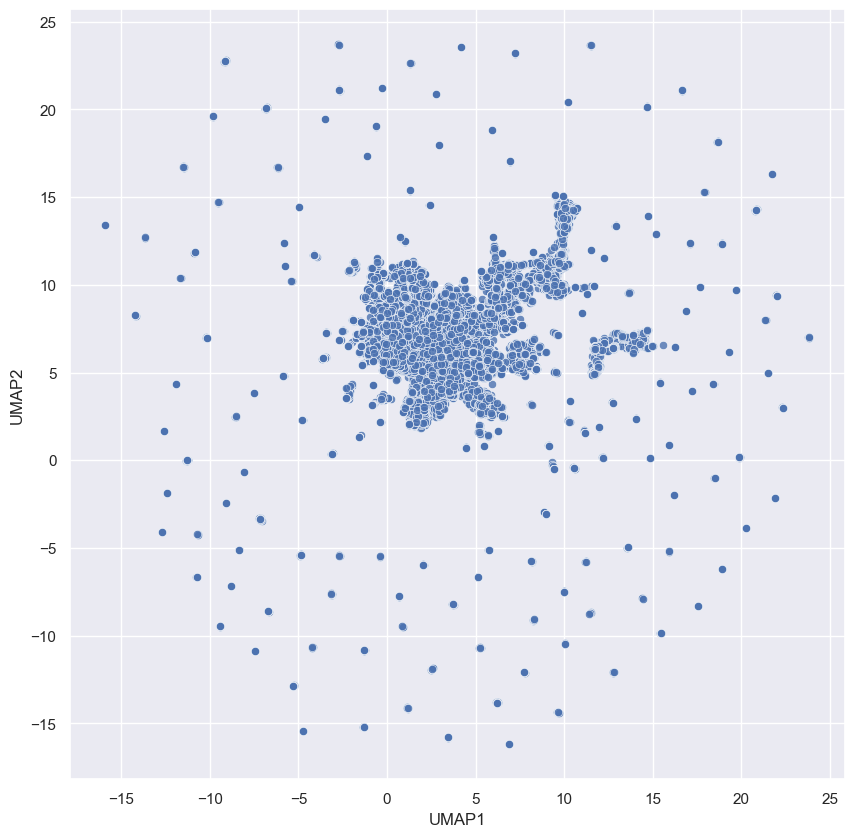

In [28]:
# Plot the UMAP data
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    data=umap_df[["UMAP1", "UMAP2"]],
    palette="tab10",
    alpha=0.8
)


plt.show()

In [29]:
hclust_4 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=4)
hc_labels_4 = hclust_4.fit_predict(umap_df[["UMAP1", "UMAP2"]])


labels_series = pd.Series(hc_labels_4, 
                          name='Hierarchical_Clustering_4_Clusters', 
                          index=umap_df[["UMAP1", "UMAP2"]].index 
                          ) 

umap_df["Hierarchical_Clustering_4_Clusters"] = labels_series

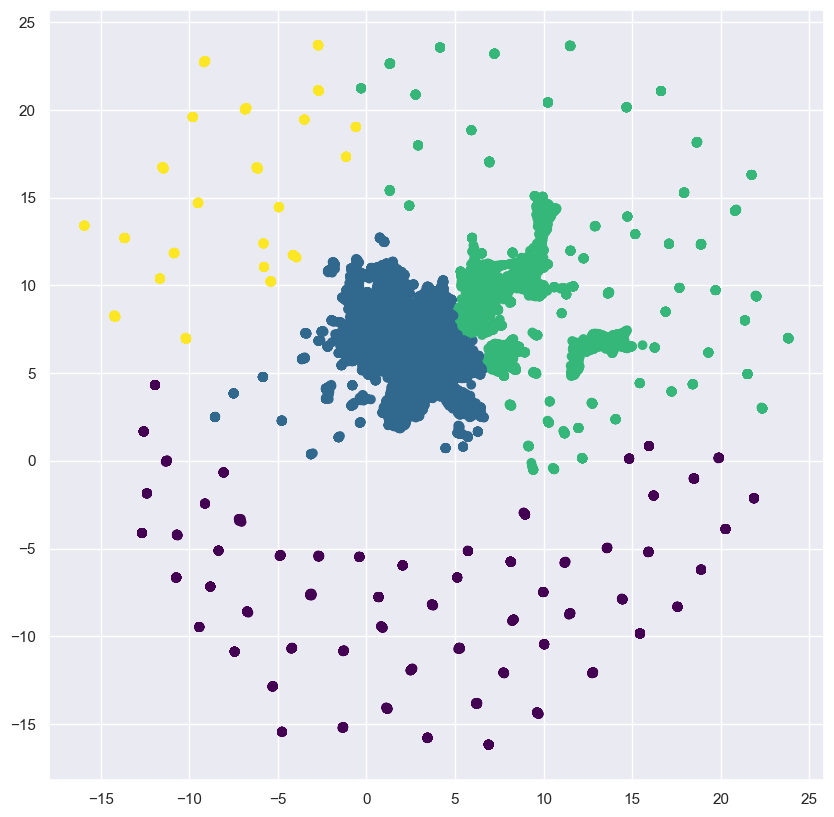

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_df["UMAP1"], umap_df["UMAP2"], c=umap_df["Hierarchical_Clustering_4_Clusters"], cmap='viridis')
plt.show()

## 1.3 Joining the two Perspectives (DOW + HOUR)

In [31]:
umap_df["Hierarchical_Clustering_4_Clusters"].value_counts()

Hierarchical_Clustering_4_Clusters
1    17394
2     8561
0     3540
3     1254
Name: count, dtype: int64

In [32]:
umap_df["Hierarchical_Clustering_4_Clusters"] = umap_df["Hierarchical_Clustering_4_Clusters"] + 1

In [33]:
df_no_outliers["Merged_Cluster_1"] = umap_df["Hierarchical_Clustering_4_Clusters"]

C:\Users\andre\AppData\Local\Temp\ipykernel_18240\2666829072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Merged_Cluster_1"] = umap_df["Hierarchical_Clustering_4_Clusters"]


In [34]:
df.loc[df_no_outliers.index, 'Merged_Cluster_1'] = df_no_outliers['Merged_Cluster_1']

In [35]:
df["Merged_Cluster_1"].value_counts()

Merged_Cluster_1
2    17394
3     8561
1     3540
4     1254
0      710
Name: count, dtype: int64

# 2. (HOURS AND DOW) + CUI MERGE

## 2.1 First Iteration Without Outliers

In [36]:
CUI_Clusters = pd.read_csv("cui_clusters_no_outliers.csv")

In [37]:
CUI_Clusters

,Unnamed: 0,K_Means_7_clusters
0,0,6
1,1,3
2,2,3
3,3,3
4,4,3
...,...,...
31454,31883,3
31455,31884,3
31456,31885,4
31457,31886,3


In [38]:
df["CUI_CLUSTER"] = CUI_Clusters["K_Means_7_clusters"]

In [39]:
# Get centroids of clusters
df_centroids_2 = df.groupby(['Merged_Cluster_1', 'CUI_CLUSTER'])\
    [DOW_col+HR_col+CUI_col].mean()


df_centroids_2

DOW_0     DOW_1     DOW_2     DOW_3  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.235401  0.239802  0.280535  0.245599   
                 1            0.270661  0.247934  0.284848  0.249878   
                 2            0.236020  0.214396  0.223684  0.230650   
                 3            0.204897  0.194057  0.232990  0.197089   
                 4            0.242500  0.218824  0.248000  0.235294   
                 5            0.323113  0.290788  0.294340  0.278579   
                 6            0.235352  0.230699  0.270833  0.256434   
1                0            0.000000  0.000000  0.000000  0.000000   
                 1            0.000000  0.000000  0.000000  0.014706   
                 2            0.006048  0.004744  0.000000  0.006641   
                 3            0.007745  0.007116  0.000000  0.009238   
                 4            0.007576  0.003565  0.000000  0.005348   
                 5            0.008929  0.004202  0.000000  0.008403   
                 6            0.012019  0.011312  0.000000  0.002262   
2                0            0.078073  0.081458  0.100037  0.088462   
                 1            0.073086  0.071653  0.077030  0.076839   
                 2            0.055521  0.049551  0.063492  0.054960   
                 3            0.032221  0.031764  0.038213  0.034950   
                 4            0.041778  0.048443  0.052406  0.047185   
                 5            0.054370  0.064323  0.058266  0.050933   
                 6            0.053659  0.056385  0.066504  0.063558   
3                0            0.080966  0.070856  0.077273  0.068182   
                 1            0.046875  0.030882  0.063333  0.057353   
                 2            0.061328  0.056203  0.068933  0.058686   
                 3            0.021510  0.019005  0.026212  0.021906   
                 4            0.048401  0.045554  0.057015  0.046544   
                 5            0.043037  0.040377  0.048538  0.045150   
                 6            0.042230  0.030207  0.036036  0.033386   
4                1            0.000000  0.000000  0.000000  0.000000   
                 2            0.000000  0.000000  0.000000  0.003676   
                 3            0.004852  0.000000  0.000056  0.002681   
                 4            0.006944  0.000000  0.000000  0.009804   
                 5            0.003289  0.000000  0.000000  0.018576   
                 6            0.000000  0.000000  0.000000  0.000000   

                                 DOW_4     DOW_5     DOW_6      HR_0  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.249088  0.183394  0.208394  0.003406   
                 1            0.284091  0.200000  0.221488  0.012121   
                 2            0.236020  0.159868  0.192105  0.059649   
                 3            0.210696  0.159794  0.163918  0.009622   
                 4            0.195000  0.166000  0.192000  0.026667   
                 5            0.306604  0.203774  0.211321  0.021384   
                 6            0.265625  0.167188  0.192969  0.011458   
1                0            0.000000  0.050000  0.000000  0.000000   
                 1            0.000000  0.012500  0.025000  0.000000   
                 2            0.010081  0.017742  0.009677  0.000000   
                 3            0.002939  0.013162  0.014700  0.000000   
                 4            0.001894  0.016667  0.018182  0.000000   
                 5            0.000000  0.017857  0.017857  0.000000   
                 6            0.000000  0.019231  0.009615  0.000000   
2                0            0.103983  0.071940  0.079383  0.001103   
                 1            0.083527  0.067865  0.080974  0.004950   
                 2            0.052135  0.040476  0.050246  0.005145   
                 3            0.043742  0.028896  0.034771  0.001178   


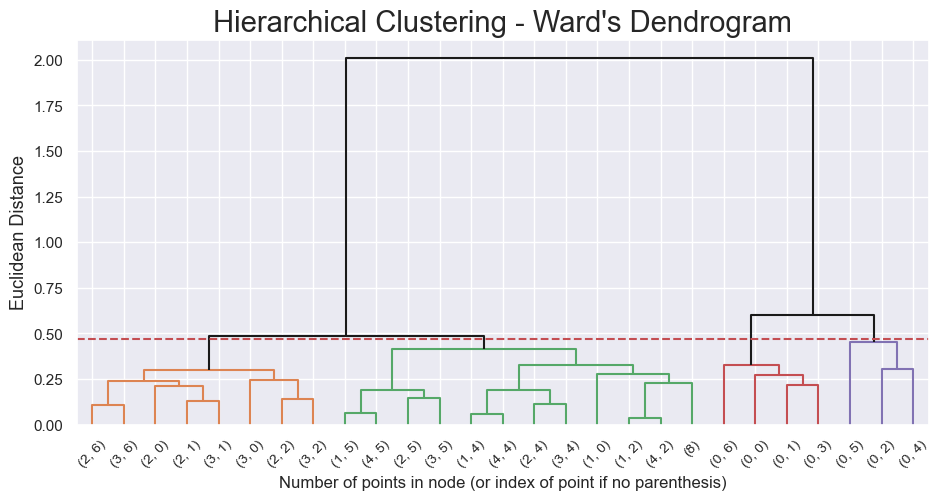

In [40]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(df_centroids_2)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 0.47
# y_threshold = 3.3

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids_2.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [41]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids_2)
df_centroids_2['hclust_labels'] = hclust_labels

df_centroids_2  # centroid's cluster labels

DOW_0     DOW_1     DOW_2     DOW_3  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.235401  0.239802  0.280535  0.245599   
                 1            0.270661  0.247934  0.284848  0.249878   
                 2            0.236020  0.214396  0.223684  0.230650   
                 3            0.204897  0.194057  0.232990  0.197089   
                 4            0.242500  0.218824  0.248000  0.235294   
                 5            0.323113  0.290788  0.294340  0.278579   
                 6            0.235352  0.230699  0.270833  0.256434   
1                0            0.000000  0.000000  0.000000  0.000000   
                 1            0.000000  0.000000  0.000000  0.014706   
                 2            0.006048  0.004744  0.000000  0.006641   
                 3            0.007745  0.007116  0.000000  0.009238   
                 4            0.007576  0.003565  0.000000  0.005348   
                 5            0.008929  0.004202  0.000000  0.008403   
                 6            0.012019  0.011312  0.000000  0.002262   
2                0            0.078073  0.081458  0.100037  0.088462   
                 1            0.073086  0.071653  0.077030  0.076839   
                 2            0.055521  0.049551  0.063492  0.054960   
                 3            0.032221  0.031764  0.038213  0.034950   
                 4            0.041778  0.048443  0.052406  0.047185   
                 5            0.054370  0.064323  0.058266  0.050933   
                 6            0.053659  0.056385  0.066504  0.063558   
3                0            0.080966  0.070856  0.077273  0.068182   
                 1            0.046875  0.030882  0.063333  0.057353   
                 2            0.061328  0.056203  0.068933  0.058686   
                 3            0.021510  0.019005  0.026212  0.021906   
                 4            0.048401  0.045554  0.057015  0.046544   
                 5            0.043037  0.040377  0.048538  0.045150   
                 6            0.042230  0.030207  0.036036  0.033386   
4                1            0.000000  0.000000  0.000000  0.000000   
                 2            0.000000  0.000000  0.000000  0.003676   
                 3            0.004852  0.000000  0.000056  0.002681   
                 4            0.006944  0.000000  0.000000  0.009804   
                 5            0.003289  0.000000  0.000000  0.018576   
                 6            0.000000  0.000000  0.000000  0.000000   

                                 DOW_4     DOW_5     DOW_6      HR_0  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.249088  0.183394  0.208394  0.003406   
                 1            0.284091  0.200000  0.221488  0.012121   
                 2            0.236020  0.159868  0.192105  0.059649   
                 3            0.210696  0.159794  0.163918  0.009622   
                 4            0.195000  0.166000  0.192000  0.026667   
                 5            0.306604  0.203774  0.211321  0.021384   
                 6            0.265625  0.167188  0.192969  0.011458   
1                0            0.000000  0.050000  0.000000  0.000000   
                 1            0.000000  0.012500  0.025000  0.000000   
                 2            0.010081  0.017742  0.009677  0.000000   
                 3            0.002939  0.013162  0.014700  0.000000   
                 4            0.001894  0.016667  0.018182  0.000000   
                 5            0.000000  0.017857  0.017857  0.000000   
                 6            0.000000  0.019231  0.009615  0.000000   
2                0            0.103983  0.071940  0.079383  0.001103   
                 1            0.083527  0.067865  0.080974  0.004950   
                 2            0.052135  0.040476  0.050246  0.005145   
                 3            0.043742  0.028896  0.034771  0.001178   


In [42]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids_2['hclust_labels'].to_dict()
cluster_mapper

{(0, 0): 2,
 (0, 1): 2,
 (0, 2): 0,
 (0, 3): 2,
 (0, 4): 0,
 (0, 5): 0,
 (0, 6): 2,
 (1, 0): 1,
 (1, 1): 1,
 (1, 2): 1,
 (1, 3): 1,
 (1, 4): 1,
 (1, 5): 1,
 (1, 6): 1,
 (2, 0): 3,
 (2, 1): 3,
 (2, 2): 3,
 (2, 3): 1,
 (2, 4): 1,
 (2, 5): 1,
 (2, 6): 3,
 (3, 0): 3,
 (3, 1): 3,
 (3, 2): 3,
 (3, 3): 1,
 (3, 4): 1,
 (3, 5): 1,
 (3, 6): 3,
 (4, 1): 1,
 (4, 2): 1,
 (4, 3): 1,
 (4, 4): 1,
 (4, 5): 1,
 (4, 6): 1}

In [43]:
df_2 = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_2['Merged_Clusters_2'] = df_2.apply(
    lambda row: cluster_mapper[
        (row['Merged_Cluster_1'], row['CUI_CLUSTER'])
    ], axis=1
)

df_2

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER,Merged_Cluster_1,CUI_CLUSTER,Merged_Clusters_2
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,1.000000,14.440,2.500000,5.776,5.776,2,1,2,6,3
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,1.000000,9.605,1.000000,9.605,9.605,2,1,2,3,1
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,1.000000,4.600,1.000000,4.600,4.600,2,1,2,3,1
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,0.666667,10.520,1.000000,10.520,10.520,2,1,2,3,1
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,0.666667,18.480,1.666667,11.088,11.088,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,1.000000,18.040,1.000000,18.040,18.040,2,1,1,3,1
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,1.000000,18.040,1.000000,18.040,18.040,2,1,1,3,1
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,1.000000,17.790,1.000000,17.790,17.790,2,1,4,4,1
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,1.000000,12.030,1.000000,12.030,12.030,2,1,1,3,1


In [44]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts_2 = df_2.groupby('Merged_Clusters_2')\
    .size()\
    .to_frame()

df_counts_2

,0
Merged_Clusters_2,
0,154
1,27418
2,556
3,3331


In [45]:
df["Merged_Cluster_2"] = df_2["Merged_Clusters_2"]

In [46]:
# Change beetween 3 and 1
df["Merged_Cluster_2"] = df["Merged_Cluster_2"].replace({1: 3, 3: 1})

In [47]:
df["Merged_Cluster_2"].value_counts()

Merged_Cluster_2
3    27418
1     3331
2      556
0      154
Name: count, dtype: int64

## 2.2 Second Iteration Without Outliers

In [48]:
df_no_outliers_2 = df[df["Merged_Cluster_2"] == 3]

In [49]:
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data_2 = umap_model.fit_transform(df_no_outliers_2[HR_col + DOW_col + CUI_col])

#Create a DataFrame for the UMAP data
umap_df_2 = pd.DataFrame(umap_data_2, columns=["UMAP1", "UMAP2"])
umap_df_2.index = df_no_outliers_2.index

c:\Users\andre\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [50]:
umap_df_2

,UMAP1,UMAP2
1,-2.148258,10.340486
2,-2.081899,10.341539
3,3.293323,13.409723
4,-2.498745,7.904302
5,9.690710,7.670131
...,...,...
31454,-1.210805,11.824494
31455,-5.295281,9.820935
31456,13.698318,7.207693
31457,-6.702765,11.319174


C:\Users\andre\AppData\Local\Temp\ipykernel_18240\806971265.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


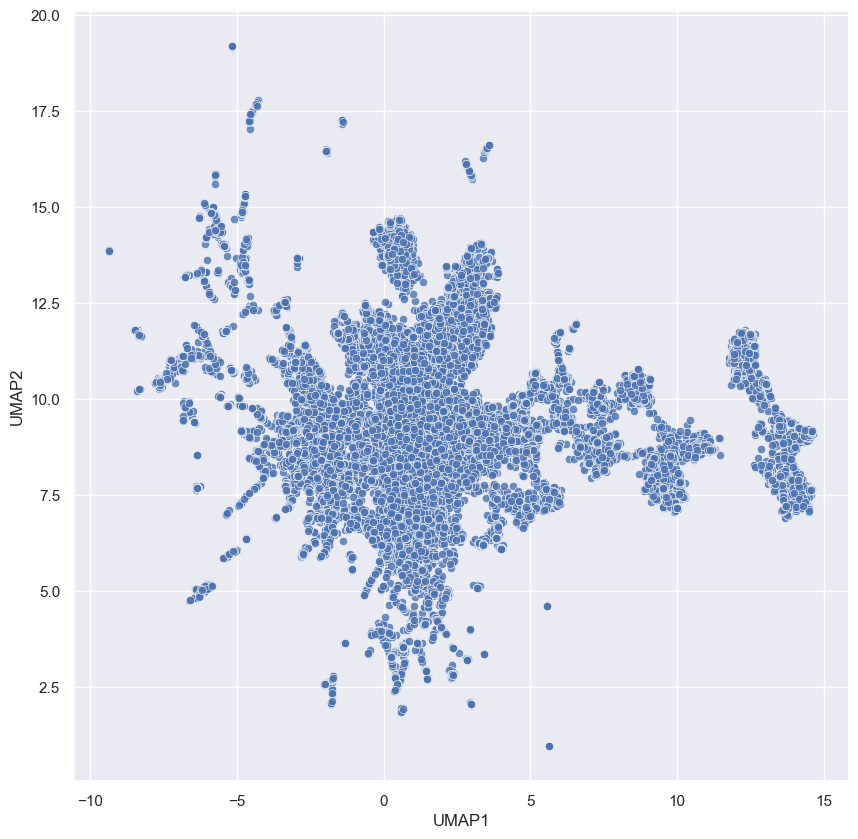

In [51]:
# Plot the UMAP data
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    data=umap_df_2[["UMAP1", "UMAP2"]],
    palette="tab10",
    alpha=0.8
)


plt.show()

In [52]:
hclust_4 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=4)
hc_labels_4 = hclust_4.fit_predict(umap_df_2[["UMAP1", "UMAP2"]])


labels_series = pd.Series(hc_labels_4, 
                          name='Hierarchical_Clustering_4_Clusters', 
                          index=umap_df_2[["UMAP1", "UMAP2"]].index 
                          ) 

umap_df_2["Hierarchical_Clustering_4_Clusters"] = labels_series

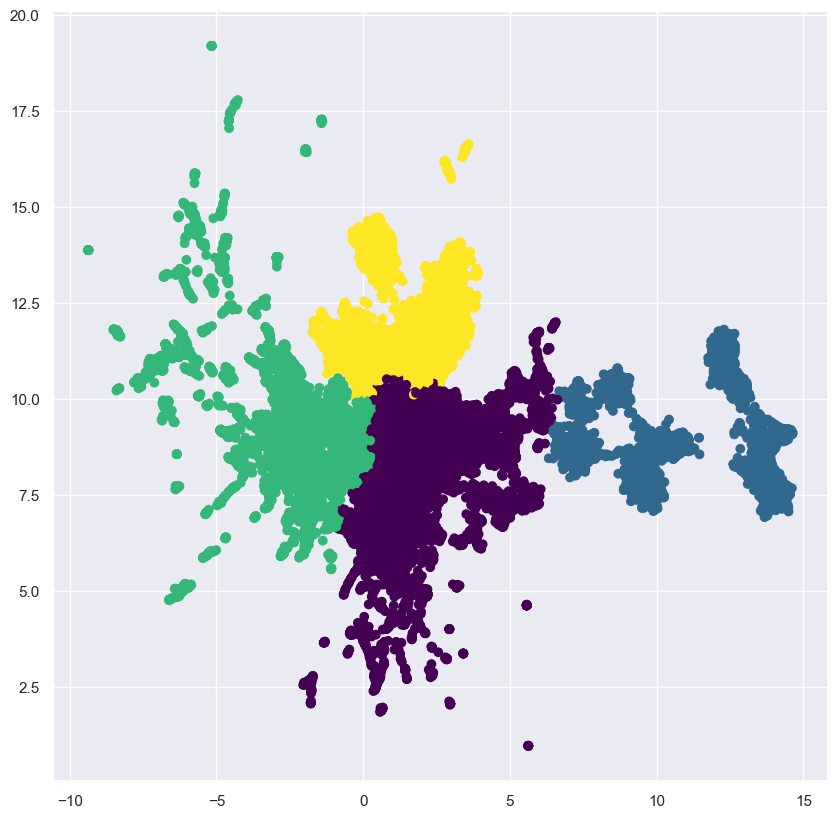

In [53]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_df_2["UMAP1"], umap_df_2["UMAP2"], c=umap_df_2["Hierarchical_Clustering_4_Clusters"], cmap='viridis')
plt.show()

In [54]:
umap_df_2["Hierarchical_Clustering_4_Clusters"].value_counts()

Hierarchical_Clustering_4_Clusters
0    9608
2    6580
3    5892
1    5338
Name: count, dtype: int64

## 2.3 Merging the Perspectives [DOW + HOUR] + CUI

In [55]:
df_no_outliers_2["Merged_Cluster_2"] = umap_df_2["Hierarchical_Clustering_4_Clusters"] + 3

C:\Users\andre\AppData\Local\Temp\ipykernel_18240\906550934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_2["Merged_Cluster_2"] = umap_df_2["Hierarchical_Clustering_4_Clusters"] + 3


In [56]:
df_no_outliers_2["Merged_Cluster_2"].value_counts()

Merged_Cluster_2
3    9608
5    6580
6    5892
4    5338
Name: count, dtype: int64

In [57]:
df.loc[df_no_outliers_2.index, 'Merged_Cluster_2'] = df_no_outliers_2["Merged_Cluster_2"]

In [58]:
df["Merged_Cluster_2"].value_counts()

Merged_Cluster_2
3    9608
5    6580
6    5892
4    5338
1    3331
2     556
0     154
Name: count, dtype: int64

# 3. Evaluating Cluster Quality (Entropy Analysis)

In [59]:
new_features_list = [item for item in new_features_list if not isinstance(item, pd.Index)]
list(new_features_list)

['customer_city',
 'used_promo',
 'order_count',
 'avg_product_by_order',
 'delta_day_order',
 'tot_value_cui',
 'order_freq',
 'value_freq',
 'product_freq',
 'avg_order_value',
 'avg_product_value']

In [60]:
new_features_list_without_city = [item for item in new_features_list if not isinstance(item, pd.Index)]
new_features_list_without_city.remove("customer_city")
new_features_list_without_city

['used_promo',
 'order_count',
 'avg_product_by_order',
 'delta_day_order',
 'tot_value_cui',
 'order_freq',
 'value_freq',
 'product_freq',
 'avg_order_value',
 'avg_product_value']

In [61]:
from scipy.stats import entropy
import numpy as np
import pandas as pd

def calculate_entropy(values):
    _, counts = np.unique(values, return_counts=True)
    return entropy(counts, base=2)

# Calculate entropy for each cluster and numerical column
entropy_columns = list(numerical_columns) + list(new_features_list_without_city)
results = {}
for cluster_label, group in df.groupby('Merged_Cluster_2'):
    cluster_results = {}
    for col in entropy_columns:
        cluster_results[col] = calculate_entropy(group[col])
    results[cluster_label] = cluster_results

# Convert to DataFrame for readability
entropy_df = pd.DataFrame(results).T  # Transpose for better readability
entropy_df.index.name = 'Cluster Label'
entropy_df

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,used_promo,order_count,avg_product_by_order,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value
Cluster Label,,,,,,,,,,,,,,,,,,,,,
0,4.344513,4.310736,4.990428,5.093412,3.333786,3.535724,5.467301,6.590764,5.545581,1.215747,...,0.945660,4.370700,6.420010,4.425758,7.240813,6.784548,7.240813,6.922504,7.240813,7.240813
1,4.552021,3.476158,4.492954,3.681860,5.485731,5.153221,5.208557,6.311951,1.882185,1.223745,...,0.926946,4.029380,5.812796,6.189748,11.553492,8.685559,11.690105,9.094853,11.649571,11.649571
2,4.475960,4.513305,5.286701,5.201988,3.590224,3.261810,7.215219,6.000417,3.233043,3.113966,...,0.890330,4.517850,7.346116,4.414418,9.111747,7.795528,9.118941,8.175518,9.118941,9.118941
3,4.558897,2.616641,3.453830,3.019677,6.075941,5.872697,4.550657,4.241194,2.054202,0.578275,...,0.998123,3.124660,3.085756,5.846397,12.159738,7.076988,12.994522,7.535305,12.468570,12.468570
4,4.543999,2.560239,3.260891,2.558396,6.229417,6.075470,4.079965,7.796425,3.547390,0.175245,...,0.999983,2.863462,3.039099,5.881656,11.461017,6.943446,12.191142,7.434401,11.605112,11.605112
5,4.572316,1.820941,2.550462,2.276187,5.906922,5.874273,3.075284,3.124845,1.054613,0.375509,...,0.995315,2.150581,2.181762,4.295328,11.513751,4.892328,12.158485,5.506908,11.690270,11.690270
6,4.531453,2.670445,3.430504,3.081234,6.108853,6.006769,4.600958,3.555001,2.541717,0.525405,...,0.997215,3.114518,3.046510,6.072054,11.746649,7.338650,12.409119,7.792156,11.986943,11.986943


In [62]:
# Calculate the weighted average entropy based on the number of rows in each cluster
avg_entropy = (entropy_df.mul(df['Merged_Cluster_2'].value_counts(), axis=0).sum() / df['Merged_Cluster_2'].value_counts().sum()).to_frame(name='Weighted Average Entropy')
avg_entropy['Average Entropy'] = entropy_df.mean(axis=0).values
avg_entropy["Difference"] = (avg_entropy["Weighted Average Entropy"] - avg_entropy["Average Entropy"]) / avg_entropy["Average Entropy"]

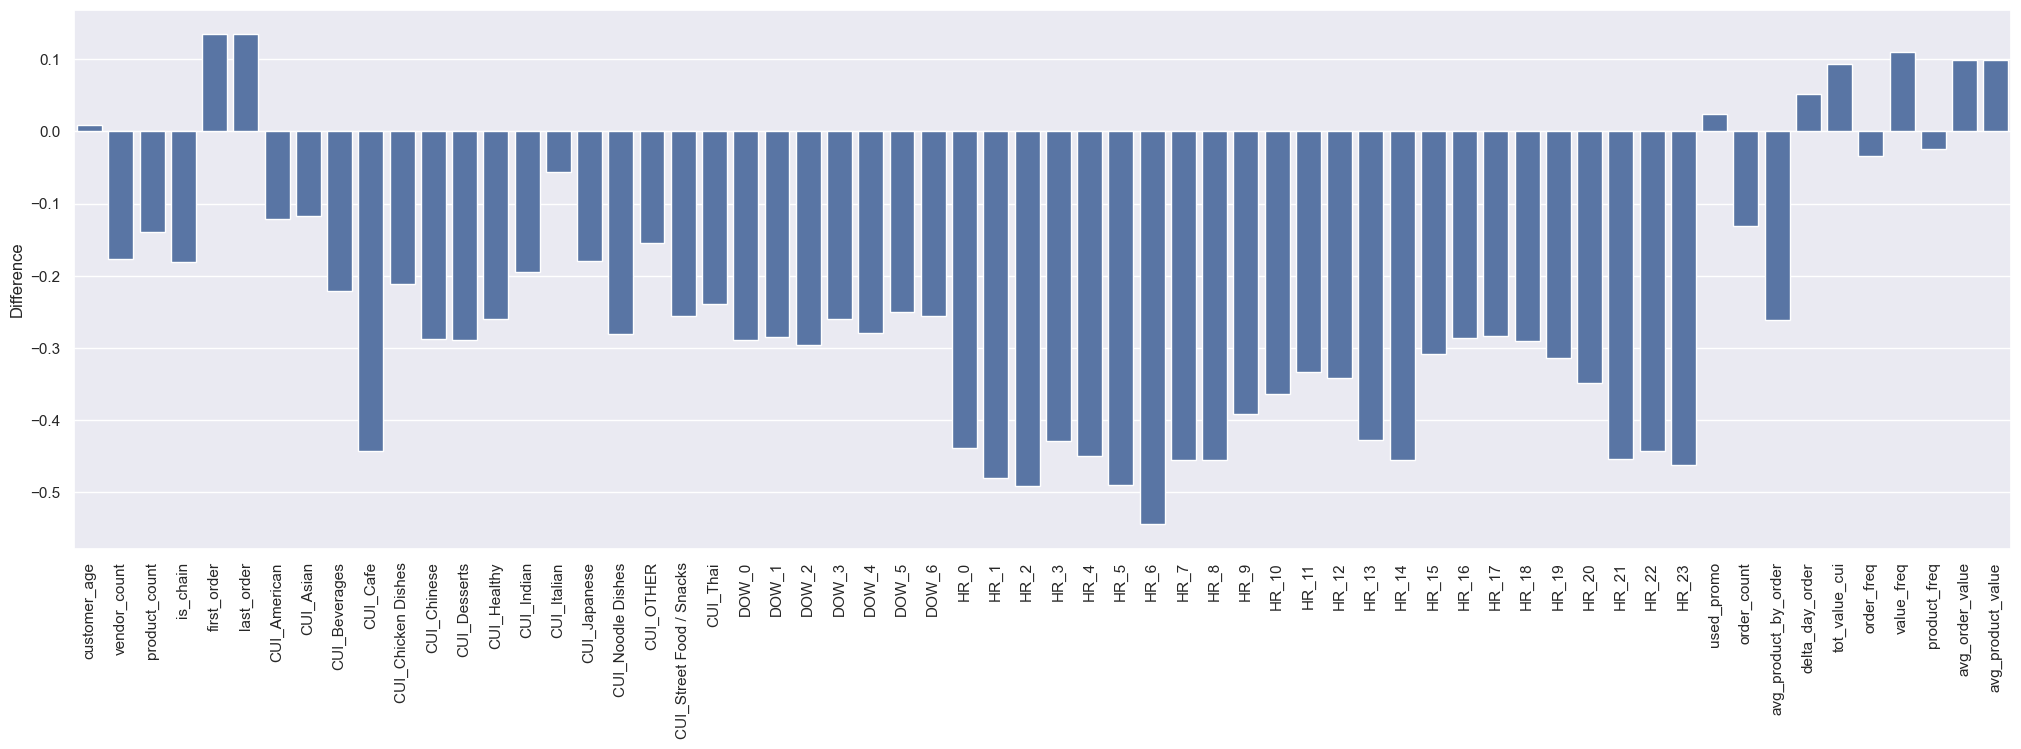

In [63]:
plt.figure(figsize=(25, 7))
sns.barplot(avg_entropy["Difference"])
plt.xticks(rotation=90)
plt.show()

# 4. Cluster Profiling

## 4.1 Radar Plots

In [64]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Variables
columns_list = [DOW_col, HR_col, CUI_col, new_features_list_without_city]
titles_list = ["DOW", "HR", "CUI", "New Features"]
cluster_labels = df["Merged_Cluster_2"].unique()

# Create subplots with larger dimensions and spacing
fig = sp.make_subplots(
    rows=len(cluster_labels),
    cols=len(columns_list),
    specs=[[{'type': 'polar'}]*len(columns_list)]*len(cluster_labels),
    subplot_titles=[f"{title} - Cluster {label}" for label in cluster_labels for title in titles_list],
    vertical_spacing=0.1,
    horizontal_spacing=0.1,
)

# Generate radar plots
for row, cluster_label in enumerate(cluster_labels, start=1):
    df_cluster = df[df["Merged_Cluster_2"] == cluster_label]
    for col, (columns, title) in enumerate(zip(columns_list, titles_list), start=1):
        # Calculate the mean for numeric columns
        mean_values = df_cluster[columns].mean()

        # Create radar trace
        radar_trace = go.Scatterpolar(
            r=mean_values.values,
            theta=mean_values.index,
            fill='toself',
            name=f"Cluster {cluster_label} - {title}",
            marker=dict(size=10),
        )

        # Add radar plot to subplots
        fig.add_trace(radar_trace, row=row, col=col)

# Update layout
fig.update_layout(
    height=500*len(cluster_labels),  # Increase height for readability
    width=2000,  # Increase width for readability
    title="Radar Charts for Each Cluster and Variable",
    title_font_size=20,
    font=dict(size=14),
    showlegend=False,
)

# Display figure
fig.show()



## 4.2 Distribution of Clients per Cluster

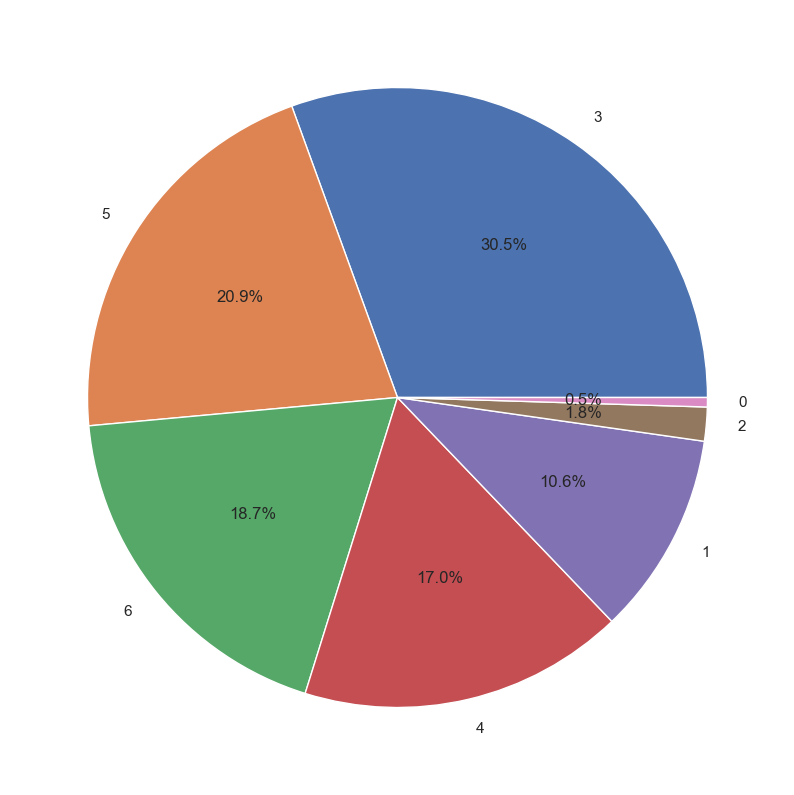

In [65]:
plt.figure(figsize=(10, 15))
plt.pie(df["Merged_Cluster_2"].value_counts(), labels=df["Merged_Cluster_2"].value_counts().index, autopct='%1.1f%%')
plt.show()

0.5
1.8
17
18.7

## 4.3 Age as a Factor

In [66]:
df.groupby("Merged_Cluster_2")["customer_age"].agg(["mean","max","min","median"])

,mean,max,min,median
Merged_Cluster_2,,,,
0,0.323622,0.810811,0.054054,0.297297
1,0.333606,1.000000,0.000000,0.297297
2,0.335067,0.972973,0.027027,0.297297
3,0.328946,1.000000,0.000000,0.297297
4,0.329625,1.000000,0.000000,0.297297
5,0.330358,1.000000,0.000000,0.297297
6,0.327710,1.000000,0.000000,0.297297


## 4.4 Weight of each cluster on the Total Amount Spent

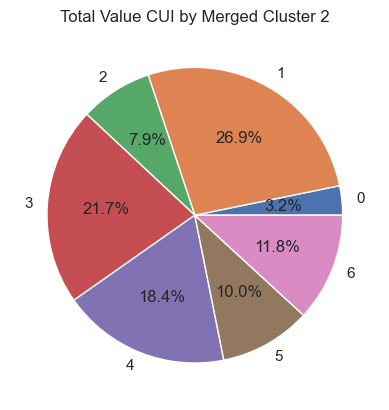

In [67]:
tot_value_cui_sum = df.groupby('Merged_Cluster_2')["tot_value_cui"].sum()
	
# Plot the pie chart
plt.pie(tot_value_cui_sum.values, labels=tot_value_cui_sum.index, autopct='%1.1f%%')
plt.title('Total Value CUI by Merged Cluster 2')
plt.show()


## 4.5 Characterization of the clusters through the new features

In [68]:
df.groupby("Merged_Cluster_2")[new_features_list_without_city].agg(["mean","median"])

used_promo        order_count        avg_product_by_order  \
                       mean median        mean median                 mean   
Merged_Cluster_2                                                             
0                  0.363636    0.0   27.922078   24.0             1.336815   
1                  0.342240    0.0    8.092765    7.0             1.608386   
2                  0.307554    0.0   27.591727   24.0             1.302833   
3                  0.474500    0.0    3.798918    3.0             1.247769   
4                  0.502435    1.0    3.328025    3.0             1.287446   
5                  0.540274    1.0    2.174772    2.0             1.287094   
6                  0.468941    0.0    3.881874    3.0             1.234238   

                           delta_day_order        tot_value_cui           \
                    median            mean median          mean   median   
Merged_Cluster_2                                                           
0                 1.300000       81.623377   84.0    251.344610  228.135   
1                 1.500000       60.156710   67.0     97.774047   87.580   
2                 1.266667       81.935252   85.0    172.553885  148.785   
3                 1.083333       35.927560   34.5     27.360435   21.565   
4                 1.166667       34.136755   32.0     41.698248   31.360   
5                 1.000000       20.265350    4.0     18.417454   15.040   
6                 1.100000       38.589104   39.0     24.313478   19.115   

                 order_freq           value_freq           product_freq  \
                       mean    median       mean    median         mean   
Merged_Cluster_2                                                          
0                  0.342925  0.302778   3.100279  2.819676     0.454286   
1                  0.166063  0.132075   2.661755  1.520000     0.283336   
2                  0.344240  0.296958   2.160517  1.857378     0.452390   
3                  0.333721  0.125000   3.776078  0.860000     0.435800   
4                  0.324433  0.115385   5.263774  1.382755     0.435138   
5                  0.572650  0.500000   6.978457  2.420000     0.768523   
6                  0.280673  0.111111   2.863387  0.662147     0.367147   

                           avg_order_value            avg_product_value  \
                    median            mean     median              mean   
Merged_Cluster_2                                                          
0                 0.402597        6.991073   7.779583          6.991073   
1                 0.194444        8.762135   8.801667          8.762135   
2                 0.386515        4.753755   4.124734          4.753755   
3                 0.151515        6.874248   6.135357          6.874248   
4                 0.142857       10.304916  10.035000         10.304916   
5                 0.666667        7.613991   6.630000          7.613991   
6                 0.133333        5.819610   4.763333          5.819610   

                             
                     median  
Merged_Cluster_2             
0                  7.779583  
1                  8.801667  
2                  4.124734  
3                  6.135357  
4                 10.035000  
5                  6.630000  
6                  4.763333

## 4.5 City Distribution by Cluster

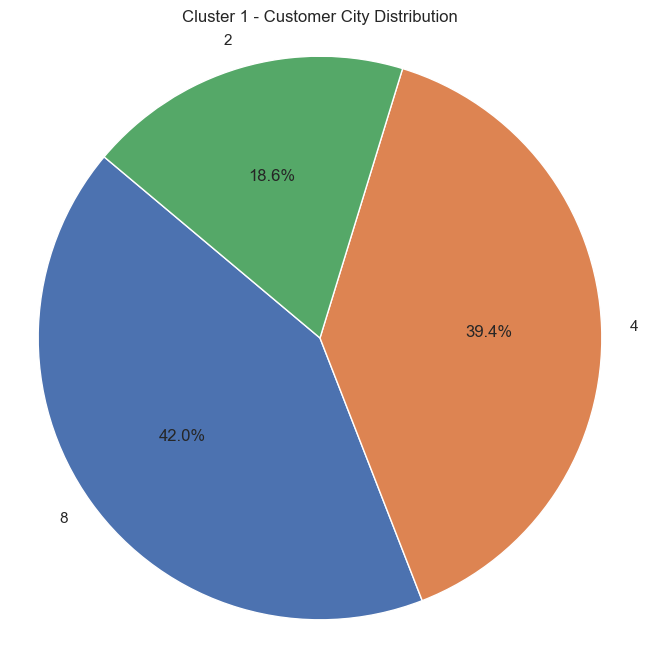

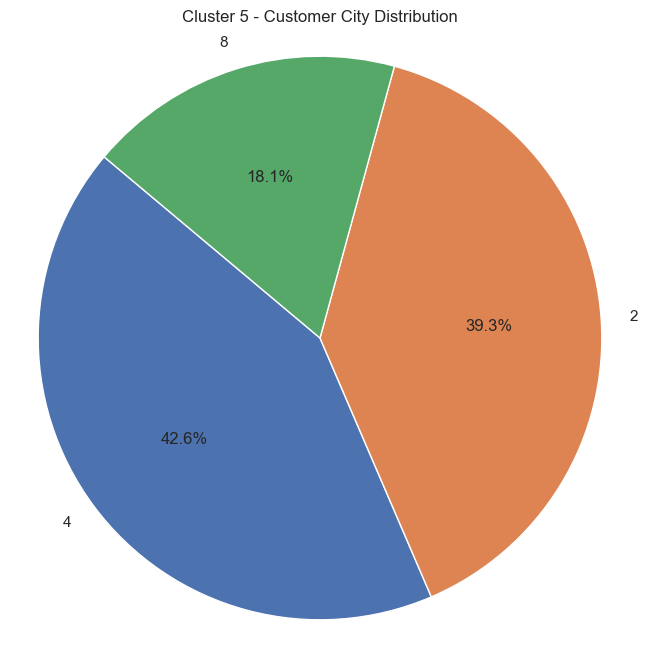

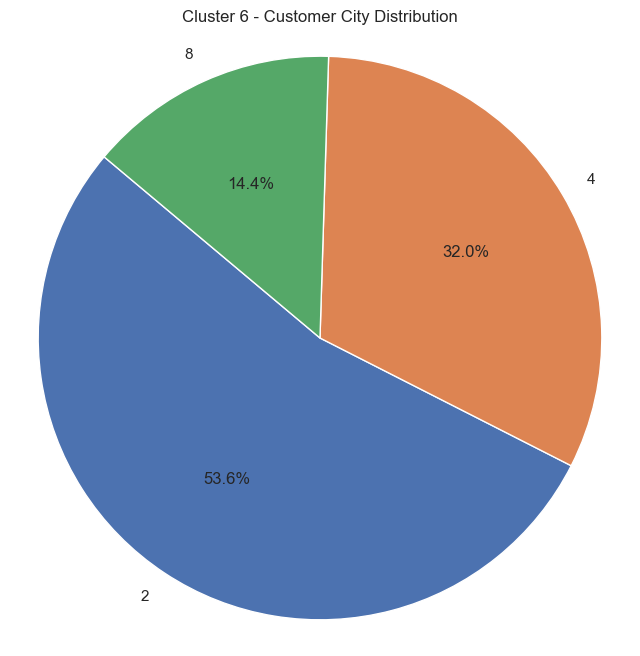

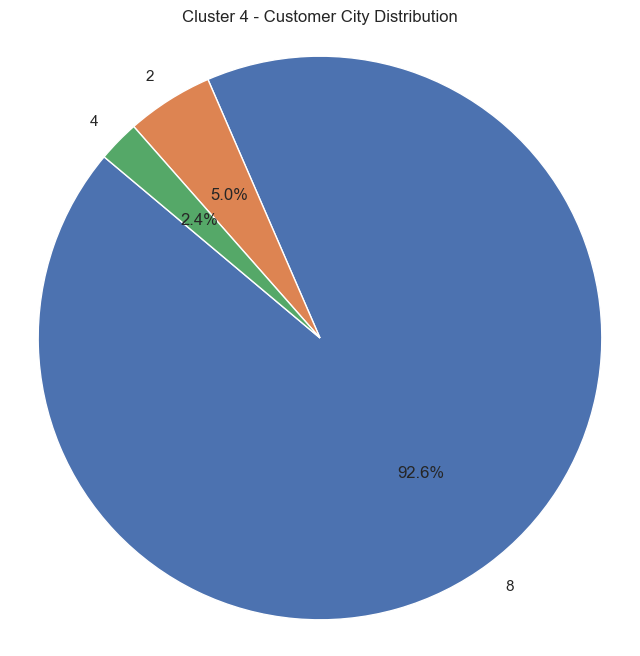

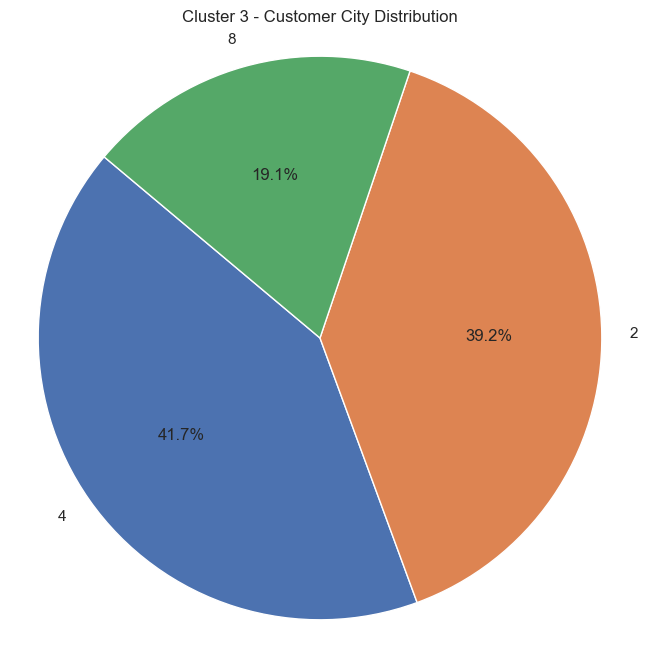

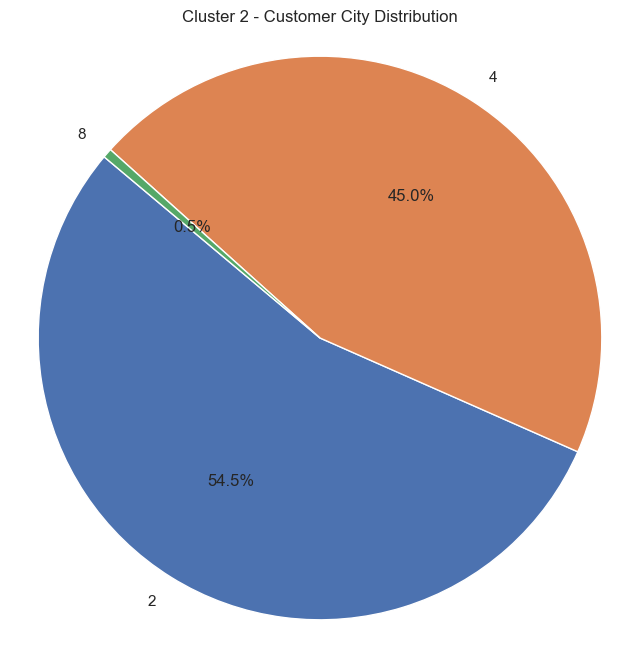

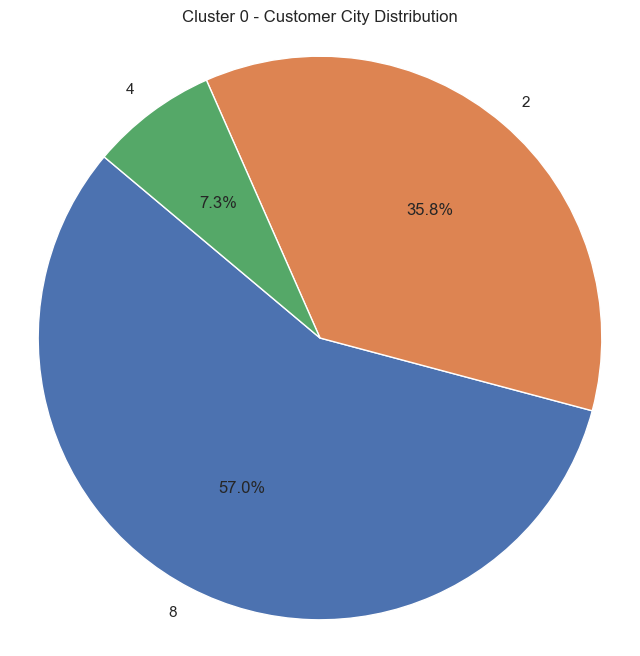

In [69]:
df.groupby("Merged_Cluster_2")["customer_city"].value_counts(normalize=True)
for cluster_label in df["Merged_Cluster_2"].unique():
    cluster_data = df[df["Merged_Cluster_2"] == cluster_label]["customer_city"].value_counts(normalize=True)
    plt.figure(figsize=(8, 8))
    plt.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Cluster {cluster_label} - Customer City Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()